## Probability distributions

The probability measures how likely the event occurs on a scale from 0 to 1. The variables of a function that assigns values to each of an experiment's outcomes is called random variable. A probability distribution describes how a random variable is distributed, this also tells us which is going to occur most or less likely.

In this notebook, some of the probability distribution function are discussed.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### Uniform distribution (Continuos)

A continuos random variable can be modelled with uniform distribution if all possible values lie in an interval and have the same frequency of occurence.

$$
X \sim U(a, b).
$$

The probability density function is

$$p(x) = \begin{cases} \frac{1}{b-a} & x \in [a, b], \\ 0 & x \not\in [a, b].\end{cases}$$


The cumulative distribution function is

$$F(x) = \begin{cases} 0 & x < a, \\ \frac{x-a}{b-a} & x \in [a, b], \\ 1 & x >= b . \end{cases}$$





In [2]:
uni_data = stats.uniform.rvs(size = 100000,
                             loc = 0,
                             scale = 10)

<Axes: ylabel='Density'>

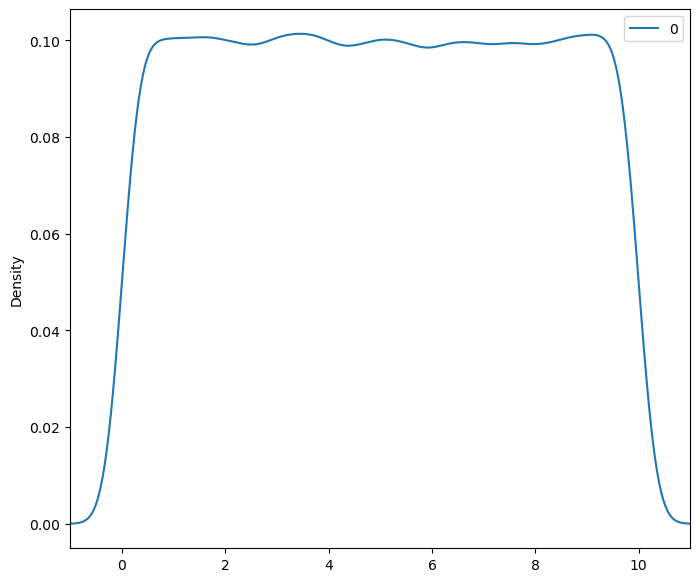

In [3]:
pd.DataFrame(uni_data).plot(kind ="density",
                            figsize = (8, 7),
                            xlim = (-1, 11))

In [4]:
# Cumulative distribution function

stats.uniform.cdf(x = 2.5,
                  loc = 0,
                  scale = 10)

0.25

In [5]:
# Percent point function (inverse of cdf)

stats.uniform.ppf(q =0.4,
                  loc = 0,
                  scale = 10) 

4.0

### Normal distribution / Gaussian distribution (Continuous)

A probability distribution that symmetric about the mean, showing the data near the mean more frequent in occurence than the data far from the mean.

The random variable is normally distributed with given mean $\mu$ and variance $\sigma^2$, written $X \sim \mathcal{N}(\mu, \sigma^2)$ if $X$ has density

$$p_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.$$

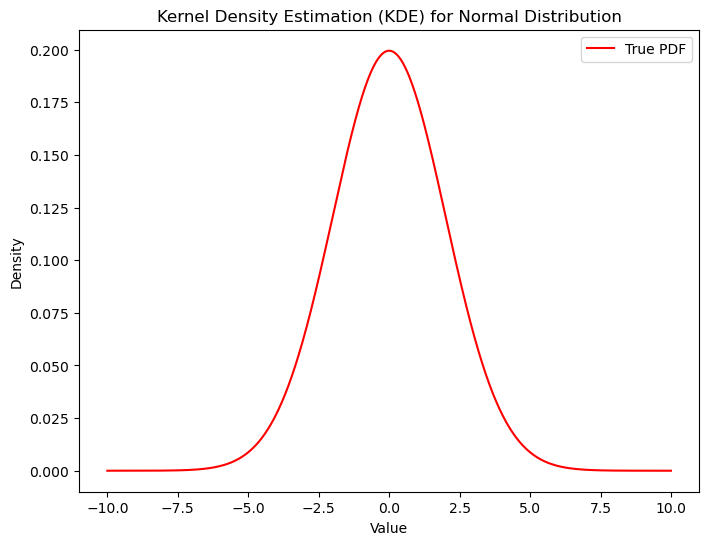

In [6]:
sample = stats.norm(loc=0, scale=1).rvs(size=100000)

# Create a KDE plot
plt.figure(figsize=(8, 6))
plt.title("Kernel Density Estimation (KDE) for Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
# plt.grid(True)

# Plot the KDE
# plt.hist(sample, bins=50, density=True, alpha=0.6, color='b', label="Sample KDE")
plt.plot(np.linspace(-10, 10, 1000), stats.norm.pdf(np.linspace(-10, 10, 1000), loc=0, scale=2), 'r', label="True PDF")

plt.legend()
plt.show()


To find the quantile

In [7]:
stats.norm.ppf(q = 0.025)

-1.9599639845400545

In [8]:
stats.norm.ppf(q = 0.975)

1.959963984540054

To find the data below the value

In [9]:
stats.norm.cdf(x = 0)

0.5

In [10]:
stats.norm.cdf(x = 2.5)

0.9937903346742238

### Binomial distribution

Binomial distribution  counts only two states, typically represented as 1 (for a success) or 0 (for a failure), given a number of trials in the data. Binomial distribution thus represents the probability for x successes in n trials, given a success probability p for each trial.

$$
X \sim \textrm{Binomial}(n, p).
$$

To get the cumulative distribution function, we need to notice that getting exactly $k$ successes can occur in $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ ways each of which has a probability of $p^k(1-p)^{n-k}$ of occurring.  Thus the cumulative distribution function is

$$F(x) = \begin{cases} 0 & x < 0, \\ \sum_{m \le k} \binom{n}{m} p^m(1-p)^{n-m}  & k \le x < k+1 \textrm{ with } 0 \le k < n, \\ 1 & x >= n . \end{cases}$$

col_0    0    1     2      3      4      5      6      7     8     9   10
row_0                                                                    
counts  100  961  4336  11699  20356  24591  20640  11761  4444  1013  99


array([[<Axes: title={'center': '0'}>]], dtype=object)

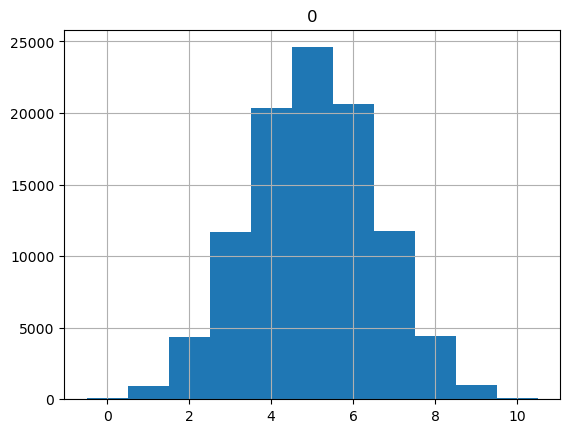

In [11]:
fair_binom = stats.binom.rvs(n = 10,
                             p = 0.5,
                             size = 100000)

print(pd.crosstab(index = "counts", columns = fair_binom))
pd.DataFrame(fair_binom).hist(range = (-0.5, 10.5), bins = 11)

col_0   2   3    4     5     6      7      8      9      10
row_0                                                      
counts   5  82  560  2646  8694  19944  30183  27040  10846


array([[<Axes: title={'center': '0'}>]], dtype=object)

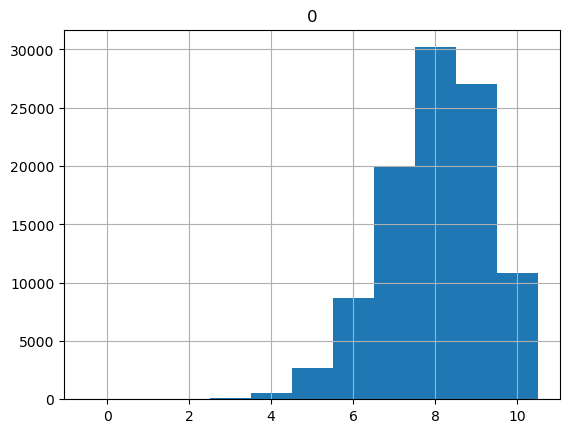

In [12]:
biased_binom = stats.binom.rvs(n = 10,
                             p = 0.8,
                             size = 100000)

print(pd.crosstab(index = "counts", columns = biased_binom))
pd.DataFrame(biased_binom).hist(range = (-0.5, 10.5), bins = 11)

In [13]:
# Probability of getting 5 successes or less
stats.binom.cdf(k = 5,
                n = 10,  # 10 flips
                p = 0.8)

0.03279349759999997

In [14]:
# Probability of getting  9 successes or more
1 - stats.binom.cdf(k = 8,
                    n = 10,
                    p = 0.8)

0.37580963840000015

For continuous probability density functions we use pdf at a given x value. For discrete distributions like binomial, we use probability mass funciton (pmf)

In [15]:
# For k = 5 successes

stats.binom.pmf(k = 5,
                n = 10,
                p = 0.5)

0.24609375000000003

In [16]:
# For k = 8 successes

stats.binom.pmf(k = 8,
                n = 10,
                p = 0.8)

0.30198988799999993

### Poisson distribution

A probability distribution that is used to show how many events an event occur over a specific period.


We will say that $X \sim \textrm{Poisson}(\lambda)$ if it is a random variable which takes the values $\{0,1,2, \ldots\}$ with probability

$$p_k = \frac{\lambda^ke^{-\lambda}}{k!}.$$

* λ is the rate at which an event occurs,
* t is the length of a time interval,
* X is the number of events in that time interval.

The value $\lambda > 0$ is known as the *rate* (or the *shape* parameter), and denotes the average number of arrivals we expect in one unit of time.  


col_0     0    1    2   3   4  5  6  7
row_0                                 
counts  370  350  193  68  13  3  2  1


array([[<Axes: title={'center': '0'}>]], dtype=object)

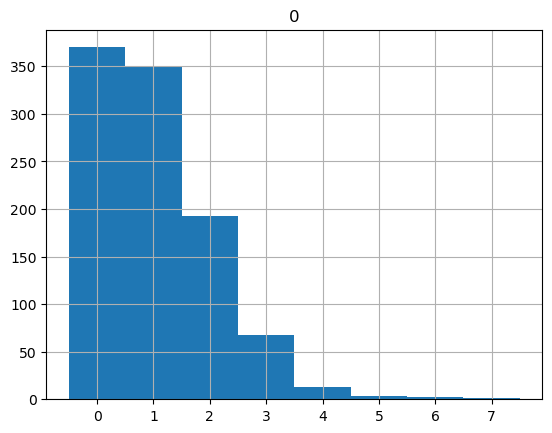

In [17]:
random.seed(10)

#Generate data
rate_1 = stats.poisson.rvs(size = 1000, mu = 1) #1000 data with time 1
print(pd.crosstab(index = "counts", columns = rate_1))

# Plot histogram
pd.DataFrame(rate_1).hist(range = (-0.5, max(rate_1) + 0.5),
                          bins = max(rate_1 + 1))

The above histogram shows that when arrival rates are low, it is rare to see more than a couple of arrivals in the time period. When the arrival rate is high, the distribution gets symmetric

col_0   2   3    4    5    6    7     8     9     10    11  ...   15   16  \
row_0                                                       ...             
counts  19  57  187  391  576  950  1153  1188  1256  1126  ...  382  205   

col_0    17  18  19  20  21  22  23  27  
row_0                                    
counts  143  74  35  21   4   6   2   1  

[1 rows x 23 columns]


array([[<Axes: title={'center': '0'}>]], dtype=object)

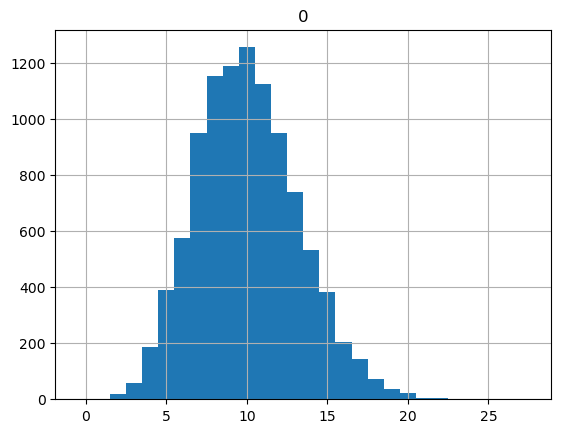

In [18]:
random.seed(10)
rate_10 = stats.poisson.rvs(size = 10000, 
                            mu = 10) # 10000 data with averate time 10
print(pd.crosstab(index = "counts", columns = rate_10))

#Plot histogram
pd.DataFrame(rate_10).hist(range=(-0.5, max(rate_10) + 0.5),
                           bins = max(rate_10 + 1))

stats.poisson.cdf() is used to check the probability of achieving more or less than a certain number of success

In [19]:
stats.poisson.cdf(k = 6,     #Check probability of 6 arrivals or less
                  mu = 10)   #With arrival rate 10

0.130141420882483

The computed value 0.06708596287903189 is the probability of observing 5 arrivals or fewer when the mean arrival rate is 10.

stats.poisson.pmf() is used to check the probability of obtaining a specific number of successes

In [20]:
stats.poisson.pmf(k = 10,  # Check the probability for exactly 10 arrivals
                  mu = 10) # with arrival rate 10

0.12511003572113372

The computed value 0.12511003572113372 is the probability of observing exactly 10 arrivals when the mean arrival rate is 10.

In [21]:
# Exponential distribution
# Geometric distribution
# Chi square distribution